In [26]:
from __future__ import print_function
__author__= 'sg5718'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
from scipy import stats
import matplotlib.pylab as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['shape', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Distributions I will choose and mean I will use

In [28]:
distributions = ['chisq','normal','poisson','binomial','Gamma']

In [3]:
mymean = 100
df = mymean

## 1） Chi-square Distribution 

In [4]:
distributions = ['chisq']

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


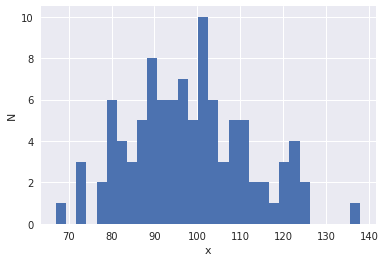

In [5]:
import numpy as np
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

Figure 1: Chi sq distribution: df = 100, N=100

In [6]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 98.05, standard deviation: 13.65


In [7]:
#mysize = (1999 / (np.array(range(1, 101)))).astype(int)
#mysize = 1000 / (np.array(range(1, 100) + [10]))
#mysize = (np.random.rand(100) * 1000).astype(int)
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[588 969  62 518 801 619 318 249 723 130 422 843 315 375  98 117 403 721
 843 330 813 320  91 278 248 105 459 760 625 567 250 345 613 807 292 362
 274 282 867 742 744  56 584  96 962   6 323 826 804 178 299 618 411 558
 159 625 972 263 646  72 411 594 107 501 371  96 171  81 900 821 683  50
 247 390 197 792 675 384 241 719 764 681 207 241 207 422 956 621 637  29
 919 631 367 997 790 504 236 905 118  75] (100,)


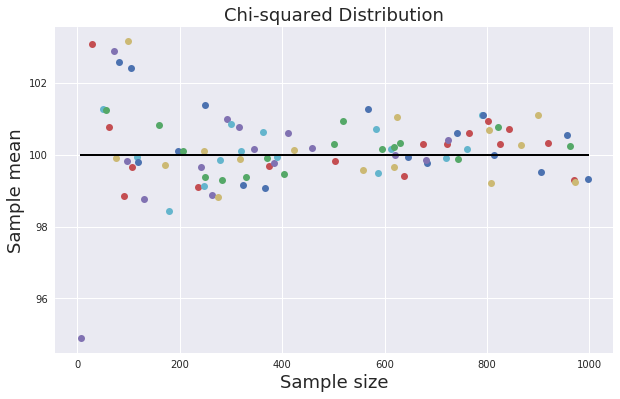

In [27]:
md['chisq'] = {}

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('Sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('Sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi-squared Distribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
    

Figure 2：In Chi-sqaured distribution (sample mean against sample size), as the number of sample size increases, the sample mean is approaching to the expected value: df = mymean =100.

### PLOT the Chi-square distributions of all sample means as a histogram.

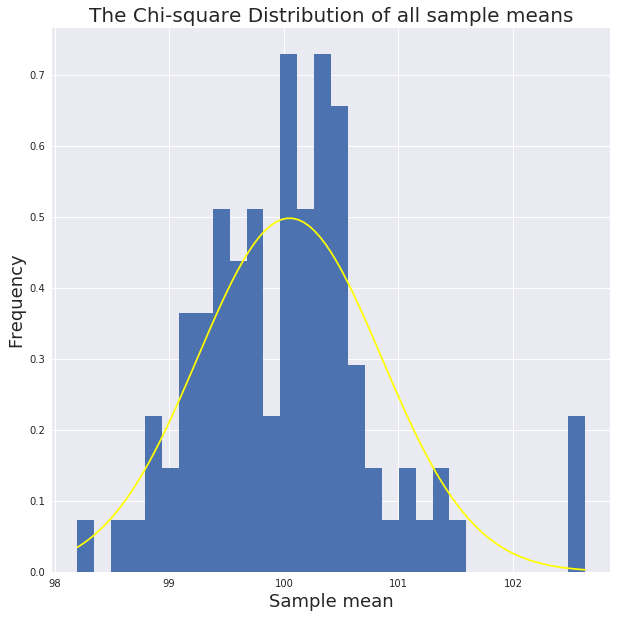

In [9]:
allmeans_chisq = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_chisq,bins=30, normed=True) 
pl.title('The Chi-square Distribution of all sample means', fontsize = 20)
pl.xlabel('Sample mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18) ## frequency = N/size

xt = plt.xticks()[0] 
xmin_chisq, xmax_chisq= min(allmeans_chisq), max(allmeans_chisq)  
lns_chisq = np.linspace(xmin_chisq, xmax_chisq, len(allmeans_chisq))
mu_chisq, sigma_chisq = stats.norm.fit(allmeans_chisq)
pdf_chisq = stats.norm.pdf(lns_chisq, mu_chisq, sigma_chisq)  
pl.plot(lns_chisq, pdf_chisq, label="Gaussian", color = 'yellow')


Figure 3: In the histogram of the mean of all Chi-square samples, it shows the distribution of the mean of all chi-square samples fit a Gaussian.

## 2） Normal Distribution 

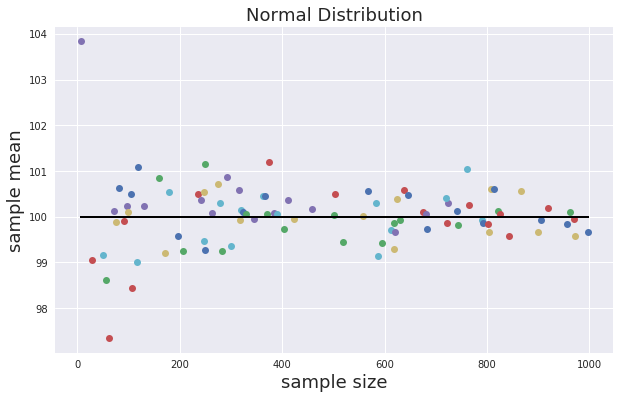

In [10]:
sigma = 10
scale = sigma
md['normal'] = {}

for n in mysize:
    md['normal'][n] = np.random.normal(df, scale, size = n)

md['normal']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        axnormal_mu_n.plot(nn, md['normal']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('Normal Distribution', fontsize=18)
        axnormal_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

    

Figure 4: In normal distribution (sample mean against sample size), as the number of sample size increases, the sample mean is approaching to the expected value: df = mymean =100.

### PLOT the Normal distributions of all sample means as a histogram.

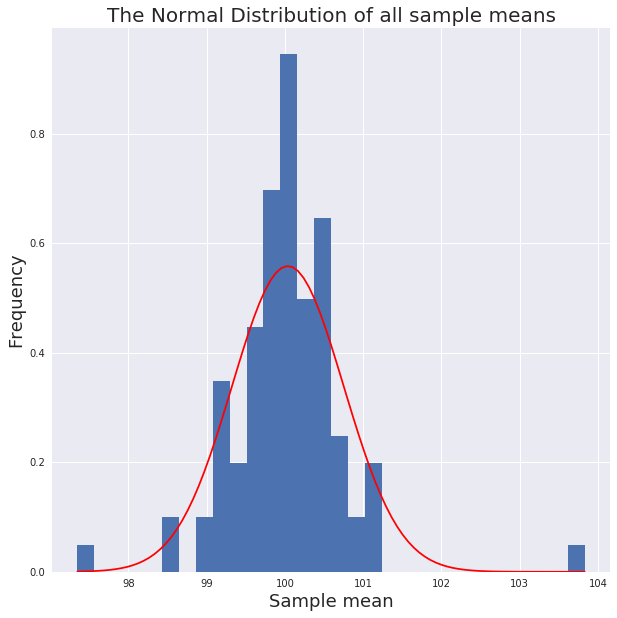

In [11]:
allmeans_normal = list(md['normal']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_normal,bins=30, normed=True) 
pl.title('The Normal Distribution of all sample means', fontsize = 20)
pl.xlabel('Sample mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18) ## frequency = N/size

xt = plt.xticks()[0] 
xmin_normal, xmax_normal= min(allmeans_normal), max(allmeans_normal)  
lns_normal = np.linspace(xmin_normal, xmax_normal, len(allmeans_normal))
mu_normal, sigma_normal = stats.norm.fit(allmeans_normal)
pdf_normal = stats.norm.pdf(lns_normal, mu_normal, sigma_normal)  
pl.plot(lns_normal, pdf_normal, label="Gaussian", color = 'r')

Figure 5: In the histogram of the mean of all normal samples, it shows the distribution of the mean of all normal samples fit a Gaussian.

## 3） Poisson Distribution 

In [12]:
distributions = ['poisson']

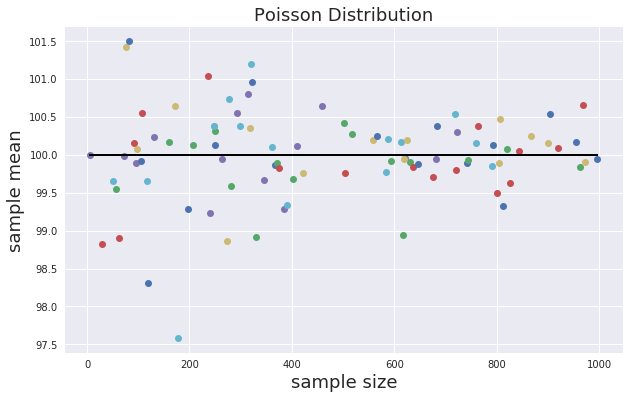

In [13]:
md['poisson'] = {}

for n in mysize:
    md['poisson'][n] = np.random.poisson(df,size = n)

md['poisson']['means'] = {}
axpoisson_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['poisson']:
    if not type(nn) == str:
        md['poisson']['means'][nn] = md['poisson'][nn].mean()
        axpoisson_mu_n.plot(nn, md['poisson']['means'][nn], 'o')
        axpoisson_mu_n.set_xlabel('sample size', fontsize=18)
        axpoisson_mu_n.set_ylabel('sample mean', fontsize=18)
        axpoisson_mu_n.set_title('Poisson Distribution', fontsize=18)
        axpoisson_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')


Figure 6: In Poisson distribution (sample mean against sample size), as the number of sample size increases, the sample mean is approaching to the expected value: df = mymean =100.

### PLOT the Poisson distributions of all sample means as a histogram.

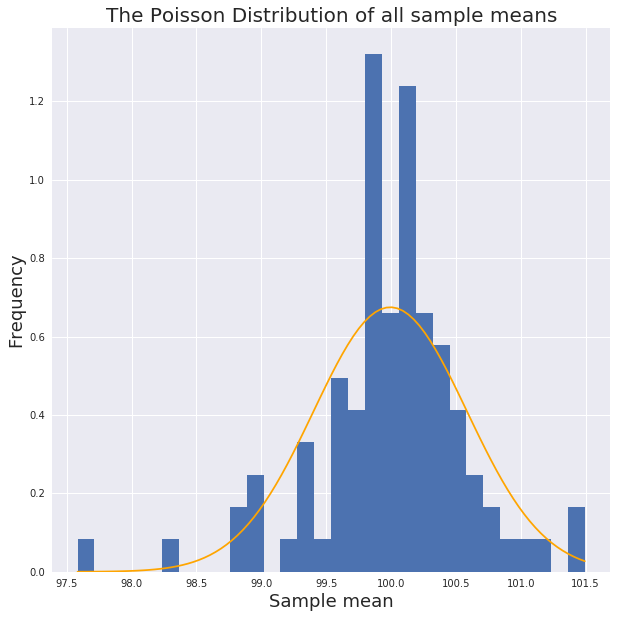

In [14]:
allmeans_poisson = list(md['poisson']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_poisson,bins=30, normed=True) 
pl.title('The Poisson Distribution of all sample means', fontsize = 20)
pl.xlabel('Sample mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18) ## frequency = N/size

xt = plt.xticks()[0] 
xmin_poisson, xmax_poisson= min(allmeans_poisson), max(allmeans_poisson)  
lns_poisson = np.linspace(xmin_poisson, xmax_poisson, len(allmeans_poisson))
mu_poisson, sigma_poisson = stats.norm.fit(allmeans_poisson)
pdf_poisson = stats.norm.pdf(lns_poisson, mu_poisson, sigma_poisson)  
pl.plot(lns_poisson, pdf_poisson, label="Gaussian", color = 'orange')

Figure 7: In the histogram of the mean of all poisson samples, it shows the distribution of the mean of all poisson samples fit a Gaussian.

## 4） Binomial Distribution 

In [15]:
distributions = ['binomial']

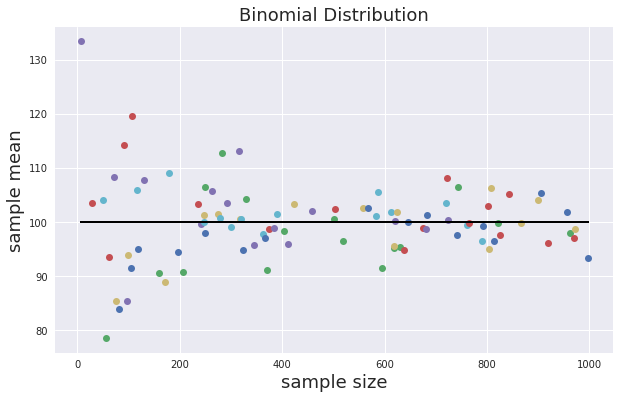

In [30]:
md['binomial'] = {}
n,p = 1,0.5

for i in mysize:
    md['binomial'][i] = np.random.binomial(n,p, size=i) *200
    
md['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial Distribution', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Figure 8: In Binomial distribution (sample mean against sample size), as the number of sample size increases, the sample mean is approaching to the expected value: df = mymean =100.

### PLOT the Binomial distributions of all sample means as a histogram.

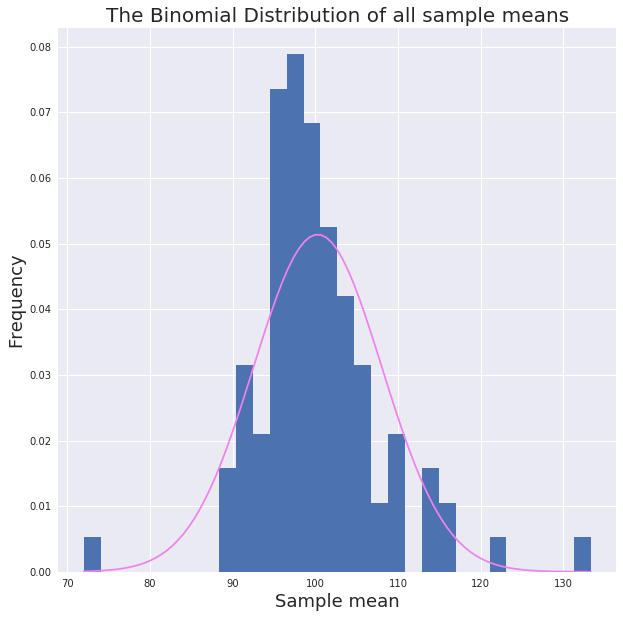

In [17]:
allmeans_binomial = list(md['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_binomial,bins=30, normed=True) 
pl.title('The Binomial Distribution of all sample means', fontsize = 20)
pl.xlabel('Sample mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18) ## frequency = N/size

xt = plt.xticks()[0] 
xmin_binomial, xmax_binomial= min(allmeans_binomial), max(allmeans_binomial)  
lns_binomial = np.linspace(xmin_binomial, xmax_binomial, len(allmeans_binomial))
mu_binomial, sigma_binomial = stats.norm.fit(allmeans_binomial)
pdf_binomial = stats.norm.pdf(lns_binomial, mu_binomial, sigma_binomial)  
pl.plot(lns_binomial, pdf_binomial, label="Gaussian", color = 'violet')


Figure 9: In the histogram of the mean of all binomial samples, it shows the distribution of the mean of all binomial samples fit a Gaussian.

## 5） Gamma Distribution

In [18]:
distributions = ['gamma']

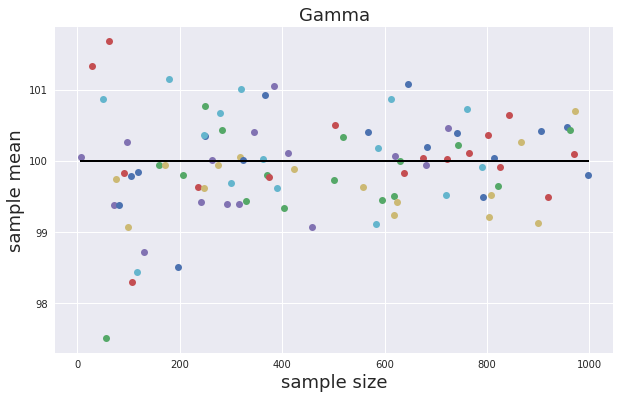

In [21]:
md['gamma'] = {}

shape = df  ##mean=shape*scale
scale = 1.0

for n in mysize:
    md['gamma'][n] = np.random.gamma(shape, scale, size = n)

md['gamma']['means'] = {}
axgamma_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['gamma']:
    if not type(nn) == str:
        md['gamma']['means'][nn] = md['gamma'][nn].mean()
        axgamma_mu_n.plot(nn, md['gamma']['means'][nn], 'o')
        axgamma_mu_n.set_xlabel('sample size', fontsize=18)
        axgamma_mu_n.set_ylabel('sample mean', fontsize=18)
        axgamma_mu_n.set_title('Gamma', fontsize=18)
        axgamma_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Figure 10: In Gamma distribution (sample mean against sample size), as the number of sample size increases, the sample mean is approaching to the expected value: df = mymean =100.

### PLOT the Gamma distributions of all sample means as a histogram.

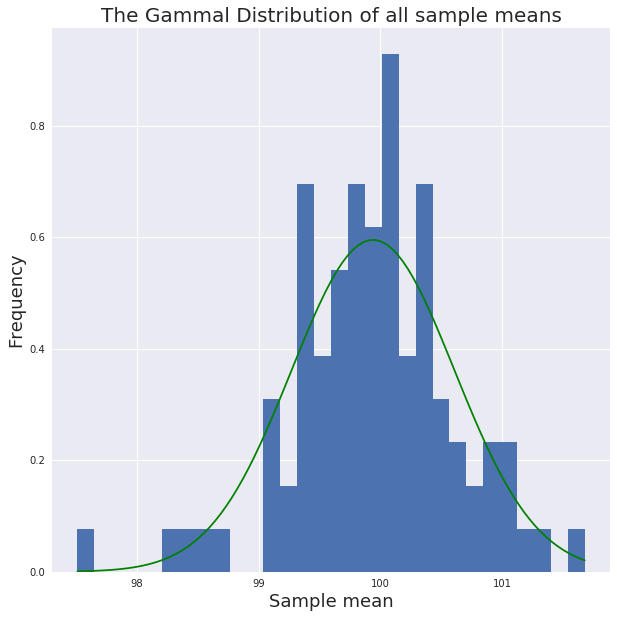

In [25]:
allmeans_gamma = list(md['gamma']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_gamma,bins=30, normed=True) 
pl.title('The Gammal Distribution of all sample means', fontsize = 20)
pl.xlabel('Sample mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18) ## frequency = N/size

xt = plt.xticks()[0] 
xmin_gamma, xmax_gamma= min(allmeans_gamma), max(allmeans_gamma)  
lns_gamma = np.linspace(xmin_gamma, xmax_gamma, len(allmeans_gamma))
mu_gamma, sigma_gamma = stats.norm.fit(allmeans_gamma)
pdf_gamma = stats.norm.pdf(lns_gamma, mu_gamma, sigma_gamma)  
pl.plot(lns_gamma, pdf_gamma, label="Gaussian", color = 'green')

Figure 11: In the histogram of the mean of all gamma samples, it shows the distribution of the mean of all gamma samples fit a Gaussian.